# DATAFRAME 1

## MEAN ANNUAL EARNINGS IRELAND 2007-2009

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Mean Annual Earnings.csv')
df1.head(10)

,Sex,Private or Public Sector,Year,Statistic Label,UNIT,VALUE
0,Both sexes,Private sector,2007,Basic Annual Earnings,Euro,32995
1,Both sexes,Private sector,2007,Annual Bonuses and Benefit in Kind,Euro,2211
2,Both sexes,Private sector,2007,Total Annual Earnings,Euro,35206
3,Both sexes,Private sector,2008,Basic Annual Earnings,Euro,35995
4,Both sexes,Private sector,2008,Annual Bonuses and Benefit in Kind,Euro,2762
5,Both sexes,Private sector,2008,Total Annual Earnings,Euro,38756
6,Both sexes,Private sector,2009,Basic Annual Earnings,Euro,35147
7,Both sexes,Private sector,2009,Annual Bonuses and Benefit in Kind,Euro,2168
8,Both sexes,Private sector,2009,Total Annual Earnings,Euro,37315
9,Both sexes,Public sector,2007,Basic Annual Earnings,Euro,44541


## EDA

In [3]:
df1.shape

(81, 6)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sex                       81 non-null     object
 1   Private or Public Sector  81 non-null     object
 2   Year                      81 non-null     int64 
 3   Statistic Label           81 non-null     object
 4   UNIT                      81 non-null     object
 5   VALUE                     81 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [5]:
df1.isnull().sum()

Sex                         0
Private or Public Sector    0
Year                        0
Statistic Label             0
UNIT                        0
VALUE                       0
dtype: int64

In [6]:
def get_unique(df, n_max = 5):
  for col in df.columns:
    print('-----------------')
    print(f'COLUMN: {col}')
    Value = df[col].unique()

    if len(Value) < n_max:
      for v in Value:
        print(f'  > {v}')

    else:
      print(f'  > More than {n_max} ({len(Value)} values)')

In [7]:
get_unique(df = df1, n_max = 5)

-----------------
COLUMN: Sex
  > Both sexes
  > Male
  > Female
-----------------
COLUMN: Private or Public Sector
  > Private sector
  > Public sector
  > All sectors
-----------------
COLUMN: Year
  > 2007
  > 2008
  > 2009
-----------------
COLUMN: Statistic Label
  > Basic Annual Earnings
  > Annual Bonuses and Benefit in Kind
  > Total Annual Earnings
-----------------
COLUMN: UNIT
  > Euro
-----------------
COLUMN: VALUE
  > More than 5 (81 values)


In [8]:
def get_dados(df, year=2007):
    df = df[df['Year'] == year]

    print(f'YEAR: {year}\n')

    for sector in df['Private or Public Sector'].unique():
        print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
        print(f'Sector: {sector}')
        for statistic in df['Statistic Label'].unique():
            print(f'  > {statistic}')
            dff = df[(df['Private or Public Sector'] == sector) & (df['Statistic Label'] == statistic)]

            m_value = dff[dff['Sex'] == 'Male']['VALUE'].values[0]
            f_value = dff[dff['Sex'] == 'Female']['VALUE'].values[0]
            dif_m_f = f_value - m_value
            perc_m_f = (f_value / m_value) - 1

            print(f"      > Female: {f_value :,.0f}")
            print(f"      > Male: {m_value:,.0f}")
            print(f"      > Dif : {dif_m_f:,.0f}")
            print(f"      > Perc : {perc_m_f:,.2%}")

        print('\n')

    print("Summary Statistics by Sex:")
    print(df.groupby('Sex')['VALUE'].describe())

In [9]:
get_dados(df1, 2007)

YEAR: 2007

- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Private sector
  > Basic Annual Earnings
      > Female: 26,055
      > Male: 37,926
      > Dif : -11,871
      > Perc : -31.30%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,325
      > Male: 2,841
      > Dif : -1,516
      > Perc : -53.36%
  > Total Annual Earnings
      > Female: 27,380
      > Male: 40,767
      > Dif : -13,387
      > Perc : -32.84%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Public sector
  > Basic Annual Earnings
      > Female: 39,591
      > Male: 52,273
      > Dif : -12,682
      > Perc : -24.26%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,190
      > Male: 2,771
      > Dif : -1,581
      > Perc : -57.06%
  > Total Annual Earnings
      > Female: 40,781
      > Male: 55,045
      > Dif : -14,264
      > Perc : -25.91%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: All sectors
  > Basic Annual Earnings
      > Female: 30,11

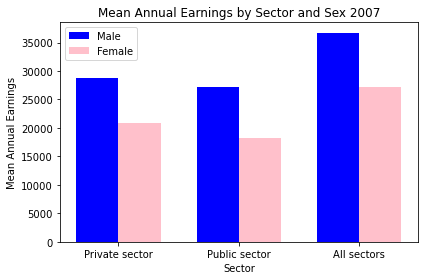

In [10]:
df_2007 = df1[df1['Year'] == 2007]

mean_male = df_2007[df_2007['Sex'] == 'Male'].groupby('Private or Public Sector')['VALUE'].mean()
mean_female = df_2007[df_2007['Sex'] == 'Female'].groupby('Private or Public Sector')['VALUE'].mean()


sectors = df_2007['Private or Public Sector'].unique()


bar_width = 0.35
r1 = range(len(sectors))
r2 = [x + bar_width for x in r1]

plt.bar(r1, mean_male, color='blue', width=bar_width, label='Male')
plt.bar(r2, mean_female, color='pink', width=bar_width, label='Female')
plt.xlabel('Sector')
plt.ylabel('Mean Annual Earnings')
plt.title('Mean Annual Earnings by Sector and Sex 2007')
plt.xticks([r + bar_width/2 for r in range(len(sectors))], sectors)
plt.legend()


plt.tight_layout()
plt.show()


In [11]:
get_dados(df1, 2008)

YEAR: 2008

- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Private sector
  > Basic Annual Earnings
      > Female: 28,446
      > Male: 41,790
      > Dif : -13,344
      > Perc : -31.93%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,839
      > Male: 3,470
      > Dif : -1,631
      > Perc : -47.00%
  > Total Annual Earnings
      > Female: 30,285
      > Male: 45,260
      > Dif : -14,975
      > Perc : -33.09%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Public sector
  > Basic Annual Earnings
      > Female: 39,455
      > Male: 54,260
      > Dif : -14,805
      > Perc : -27.29%
  > Annual Bonuses and Benefit in Kind
      > Female: 657
      > Male: 2,360
      > Dif : -1,703
      > Perc : -72.16%
  > Total Annual Earnings
      > Female: 40,112
      > Male: 56,620
      > Dif : -16,508
      > Perc : -29.16%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: All sectors
  > Basic Annual Earnings
      > Female: 32,433


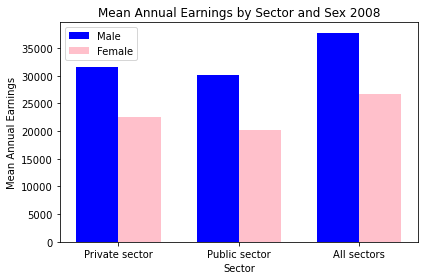

In [12]:
df_2008 = df1[df1['Year'] == 2008]

mean_male = df_2008[df_2008['Sex'] == 'Male'].groupby('Private or Public Sector')['VALUE'].mean()
mean_female = df_2008[df_2008['Sex'] == 'Female'].groupby('Private or Public Sector')['VALUE'].mean()


sectors = df_2008['Private or Public Sector'].unique()


bar_width = 0.35
r1 = range(len(sectors))
r2 = [x + bar_width for x in r1]

plt.bar(r1, mean_male, color='blue', width=bar_width, label='Male')
plt.bar(r2, mean_female, color='pink', width=bar_width, label='Female')
plt.xlabel('Sector')
plt.ylabel('Mean Annual Earnings')
plt.title('Mean Annual Earnings by Sector and Sex 2008')
plt.xticks([r + bar_width/2 for r in range(len(sectors))], sectors)
plt.legend()


plt.tight_layout()
plt.show()

In [13]:
get_dados(df1, 2009)

YEAR: 2009

- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Private sector
  > Basic Annual Earnings
      > Female: 27,997
      > Male: 41,421
      > Dif : -13,424
      > Perc : -32.41%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,318
      > Male: 2,913
      > Dif : -1,595
      > Perc : -54.75%
  > Total Annual Earnings
      > Female: 29,316
      > Male: 44,333
      > Dif : -15,017
      > Perc : -33.87%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: Public sector
  > Basic Annual Earnings
      > Female: 41,448
      > Male: 54,985
      > Dif : -13,537
      > Perc : -24.62%
  > Annual Bonuses and Benefit in Kind
      > Female: 1,198
      > Male: 2,620
      > Dif : -1,422
      > Perc : -54.27%
  > Total Annual Earnings
      > Female: 42,646
      > Male: 57,605
      > Dif : -14,959
      > Perc : -25.97%


- - - - - - - - - - - - - - - - - - - - - - - - - - -
Sector: All sectors
  > Basic Annual Earnings
      > Female: 32,65

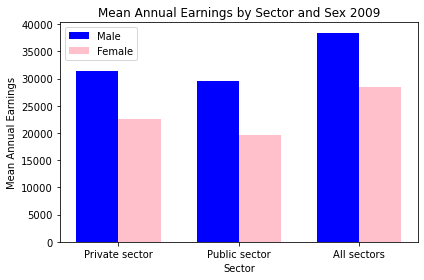

In [14]:
df_2009 = df1[df1['Year'] == 2009]

mean_male = df_2009[df_2009['Sex'] == 'Male'].groupby('Private or Public Sector')['VALUE'].mean()
mean_female = df_2009[df_2009['Sex'] == 'Female'].groupby('Private or Public Sector')['VALUE'].mean()


sectors = df_2009['Private or Public Sector'].unique()


bar_width = 0.35
r1 = range(len(sectors))
r2 = [x + bar_width for x in r1]

plt.bar(r1, mean_male, color='blue', width=bar_width, label='Male')
plt.bar(r2, mean_female, color='pink', width=bar_width, label='Female')
plt.xlabel('Sector')
plt.ylabel('Mean Annual Earnings')
plt.title('Mean Annual Earnings by Sector and Sex 2009')
plt.xticks([r + bar_width/2 for r in range(len(sectors))], sectors)
plt.legend()


plt.tight_layout()
plt.show()

In [15]:
def plot_mean_annual(df, years=[2007, 2008, 2009]):
    dft = df[df['Year'].isin(years)]

    pivot_table = dft.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='mean')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pivot_table, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009')
    plt.xlabel('YEAR')
    plt.ylabel('MEAN')
    plt.show()



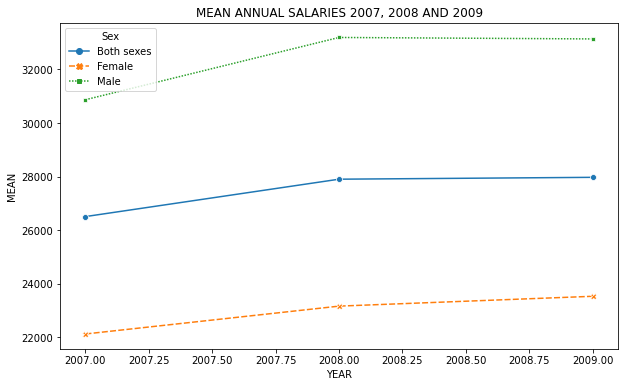

In [16]:
plot_mean_annual(df1)

In [17]:
df_private = df1[(df1['Private or Public Sector'] == 'Private sector') & 
                (df1['Statistic Label'] == 'Total Annual Earnings')]


df_public = df1[(df1['Private or Public Sector'] == 'Public sector') & 
                (df1['Statistic Label'] == 'Total Annual Earnings')]

df_private_male = df_private[df_private['Sex'] == 'Male']
X_private_male = df_private_male['Year'].values.reshape(-1, 1)
y_private_male = df_private_male['VALUE'].values

mpm = LinearRegression()
mpm.fit(X_private_male, y_private_male)

coefm = mpm.coef_[0]
interm = mpm.intercept_

private_men = mpm.predict([[2010]])
print('Total annual earnings for men in the private sector in 2010:', private_men[0])



df_private_female = df_private[df_private['Sex'] == 'Female']
X_private_female = df_private_female['Year'].values.reshape(-1, 1)
y_private_female = df_private_female['VALUE'].values

mpf = LinearRegression()
mpf.fit(X_private_female, y_private_female)

coeff = mpf.coef_[0]
interf = mpf.intercept_

private_women = mpf.predict([[2010]])
print('Total annual earnings for women in the private sector in 2010:', private_women[0])





df_public_male = df_public[df_public['Sex'] == 'Male']
X_public_male = df_public_male['Year'].values.reshape(-1, 1)
y_public_male = df_public_male['VALUE'].values

mpum = LinearRegression()
mpum.fit(X_public_male, y_public_male)

coefpm = mpum.coef_[0]
interpm = mpum.intercept_

public_men = mpum.predict([[2010]])
print('Total annual earnings for men in the public sector in 2010:', public_men[0])


df_public_female = df_public[df_public['Sex'] == 'Female']
X_public_female = df_public_female['Year'].values.reshape(-1, 1)
y_public_female = df_public_female['VALUE'].values

mpuf = LinearRegression()
mpuf.fit(X_public_female, y_public_female)


coefpuf = mpuf.coef_[0]
interpuf = mpuf.intercept_

public_women = mpuf.predict([[2010]])
print('Total annual earnings for women in the public sector in 2010:', public_women[0])


Total annual earnings for men in the private sector in 2010: 47019.33333333349
Total annual earnings for women in the private sector in 2010: 30929.666666666744
Total annual earnings for men in the public sector in 2010: 58983.33333333349
Total annual earnings for women in the public sector in 2010: 43044.666666666744


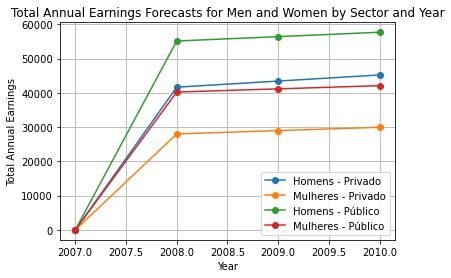

In [18]:
apm = mpm.predict(X_private_male)
apf = mpf.predict(X_private_female)

# Previsões dos ganhos anuais totais para homens e mulheres no setor público
apum = mpum.predict(X_public_male)
apuf = mpuf.predict(X_public_female)

# Criar um gráfico de linhas para visualizar os resultados
year = [2007, 2008, 2009, 2010]
vmp = [0] + apm.tolist()
vfp = [0] + apf.tolist()
vmpu = [0] + apum.tolist()
vfpu = [0] + apuf.tolist()

plt.plot(year, vmp, marker='o', label='Homens - Privado')
plt.plot(year, vfp, marker='o', label='Mulheres - Privado')
plt.plot(year, vmpu, marker='o', label='Homens - Público')
plt.plot(year, vfpu, marker='o', label='Mulheres - Público')

plt.xlabel('Year')
plt.ylabel('Total Annual Earnings')
plt.title('Total Annual Earnings Forecasts for Men and Women by Sector and Year')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
def plot_mean_annual_earnings(df, years=[2007, 2008, 2009]):
    dft = df[df['Year'].isin(years)]

    
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    pivot_table_private = dft[dft['Private or Public Sector'] == 'Private sector'].pivot_table(
        index='Year', columns=['Statistic Label', 'Sex'], values='VALUE', aggfunc='mean')
    pivot_table_private.columns = pivot_table_private.columns.map('{0[0]} - {0[1]}'.format)
    sns.lineplot(data=pivot_table_private, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Private Sector')
    plt.xlabel('YEAR')
    plt.ylabel('MEAN')

    
    plt.subplot(1, 2, 2)
    pivot_table_public = dft[dft['Private or Public Sector'] == 'Public sector'].pivot_table(
        index='Year', columns=['Statistic Label', 'Sex'], values='VALUE', aggfunc='mean')
    pivot_table_public.columns = pivot_table_public.columns.map('{0[0]} - {0[1]}'.format)
    sns.lineplot(data=pivot_table_public, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Public Sector')
    plt.xlabel('YEAR')
    plt.ylabel('MEAN')

    plt.tight_layout()
    plt.show()




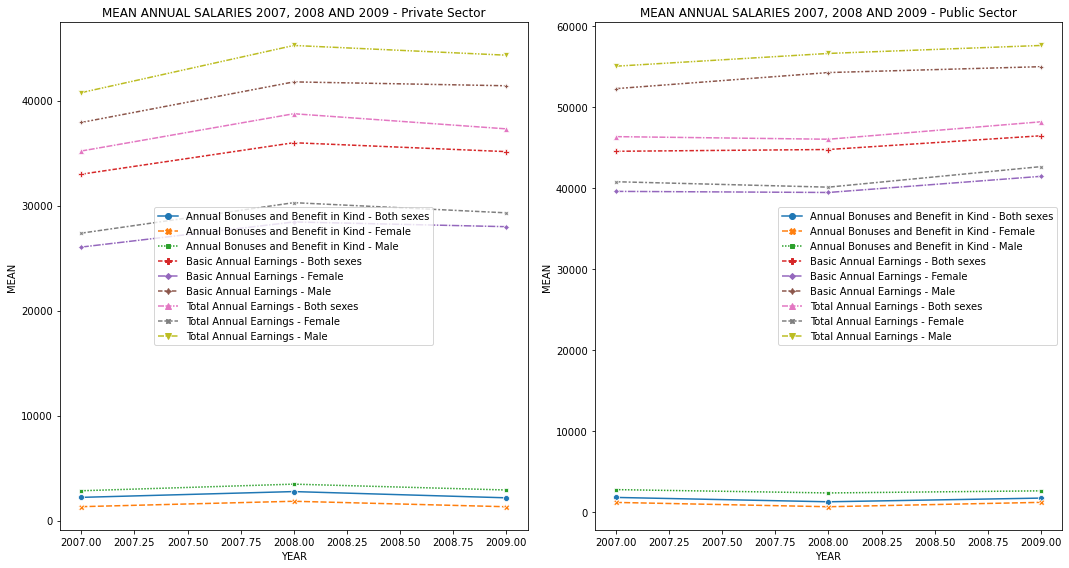

In [20]:
plot_mean_annual_earnings(df1)

In [21]:
def plot_annual_earnings(df, years=[2007, 2008, 2009]):
    dft = df[df['Year'].isin(years)]

    
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    pivot_table_private = dft[dft['Private or Public Sector'] == 'Private sector'].pivot_table(
        index=['Year', 'Statistic Label'], columns='Sex', values='VALUE', aggfunc='mean')
    pivot_table_private.plot(kind='bar', rot=45, width=0.8, colormap='Paired', ax=plt.gca())
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Private Sector')
    plt.xlabel('YEAR / STATISTIC LABEL', fontsize=10)  
    plt.ylabel('MEAN')

    
    plt.subplot(1, 2, 2)
    pivot_table_public = dft[dft['Private or Public Sector'] == 'Public sector'].pivot_table(
        index=['Year', 'Statistic Label'], columns='Sex', values='VALUE', aggfunc='mean')
    pivot_table_public.plot(kind='bar', rot=45, width=0.8, colormap='Paired', ax=plt.gca())
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Public Sector')
    plt.xlabel('YEAR / STATISTIC LABEL', fontsize=10)  
    plt.ylabel('MEAN')

    plt.tight_layout()
    plt.show()



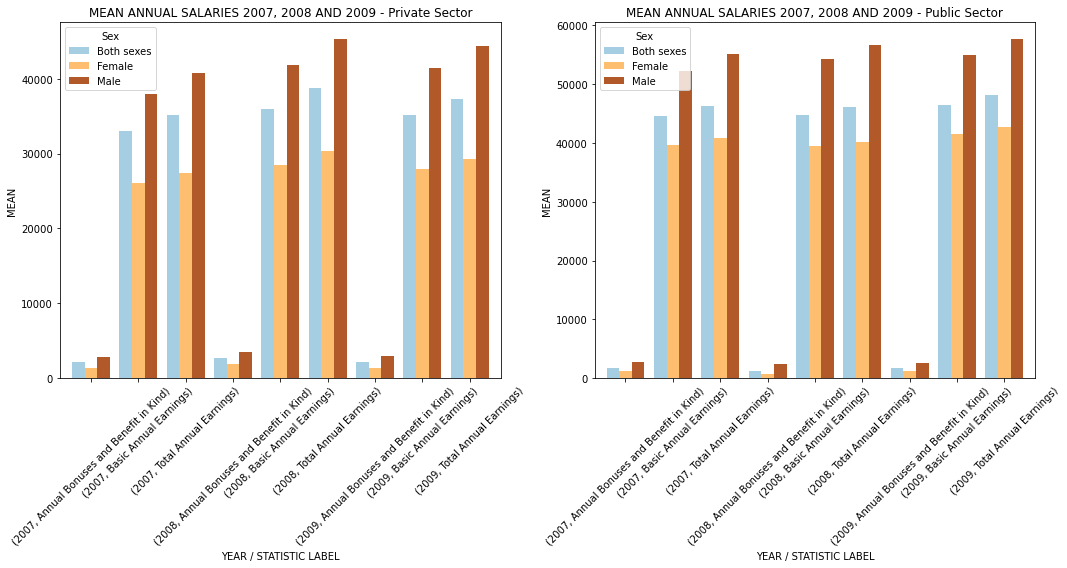

In [22]:
plot_annual_earnings(df1)

## Inferential statistics

In [30]:
private_sector = df1[df1['Private or Public Sector'] == 'Private sector']
public_sector = df1[df1['Private or Public Sector'] == 'Public sector']

def perform_t_test(data, column, statistic_label):
    male_data = data[(data['Sex'] == 'Male') & (data['Statistic Label'] == statistic_label)]
    female_data = data[(data['Sex'] == 'Female') & (data['Statistic Label'] == statistic_label)]

    t_statistic, p_value = ttest_ind(male_data['VALUE'], female_data['VALUE'])

    print(f"Statistic Label: {statistic_label}")
    print(f"Test Statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print("")


for statistic_label in df1['Statistic Label'].unique():
    perform_t_test(private_sector, 'Private sector', statistic_label)
    perform_t_test(public_sector, 'Public sector', statistic_label)

Statistic Label: Basic Annual Earnings
Test Statistic: 8.986843441032876
P-value: 0.0008485893765422326

Statistic Label: Basic Annual Earnings
Test Statistic: 13.217146471643998
P-value: 0.0001893241302790999

Statistic Label: Annual Bonuses and Benefit in Kind
Test Statistic: 6.00599708846592
P-value: 0.0038683456333966047

Statistic Label: Annual Bonuses and Benefit in Kind
Test Statistic: 7.278187932122567
P-value: 0.0018935911584615445

Statistic Label: Total Annual Earnings
Test Statistic: 8.95900751303585
P-value: 0.0008587637534402128

Statistic Label: Total Annual Earnings
Test Statistic: 14.336021256182285
P-value: 0.00013755578996650045



In [23]:
df3 = pd.read_csv('NSA19.20230713T170713.csv')
df3.sample(10)

,Sex,Occupation,Private or Public Sector,Year,Statistic Label,UNIT,VALUE
139,Female,Associate professional and technical,Private sector,2007,Median Hourly Earnings,Euro,16.01
85,Male,Clerical and secretarial,Private sector,2007,Median Hourly Earnings,Euro,15.12
8,Both sexes,Managers and administrators,Public sector,2007,Mean Hourly Earnings,Euro,39.51
128,Female,Managers and administrators,Public sector,2007,Mean Hourly Earnings,Euro,36.40
76,Male,Professional,All sectors,2007,Mean Hourly Earnings,Euro,35.06
137,Female,Professional,All sectors,2007,Median Hourly Earnings,Euro,29.93
107,Male,Sales,All sectors,2007,Median Hourly Earnings,Euro,13.73
110,Male,Plant and machine operatives,Public sector,2007,Mean Hourly Earnings,Euro,20.45
73,Male,Professional,Private sector,2007,Median Hourly Earnings,Euro,25.28
25,Both sexes,Clerical and secretarial,Private sector,2007,Median Hourly Earnings,Euro,14.30


In [24]:
df4 = pd.read_csv('NSA22.20230713T170745.csv')
df4.sample(2)

,Sex,Level of Education,Private or Public Sector,Year,Statistic Label,UNIT,VALUE
69,Male,Third level degree or higher,Public sector,2007,Median Hourly Earnings,Euro,34.48
107,Female,Third level degree or higher,All sectors,2007,Median Hourly Earnings,Euro,22.43


In [25]:
df5 = pd.read_csv('NSA28.20230713T170727.csv')
df5.sample(2)

,Sex,Private or Public Sector,Years in Employment,Year,Statistic Label,UNIT,VALUE
53,Male,Public sector,5 to 9 years,2007,Median Hourly Earnings,Euro,23.14
19,Both sexes,Public sector,10 to 19 years,2007,Median Hourly Earnings,Euro,21.94


In [26]:
df_train.describe()

NameError: name 'df_train' is not defined

In [ ]:
tarifa_homens = df_train[df_train['Sex']=='Male' & [Private or Public Sector == 'Private sector']]['VALUE'].values
tarifa_mulheres = df_train[df_train['Sex']=='Female'& [Private or Public Sector == 'Private sector']['VALUE'].values


In [ ]:
print('qtd. homens: ', tarifa_homens.shape[0])
print('qtd. mulheres: ', tarifa_mulheres.shape[0])

print('média de tarifa homens: ', np.mean(tarifa_homens))
print('média de tarifa mulhers: ', np.mean(tarifa_mulheres))

##Visualizando as distribuições
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.hist(tarifa_homens)
ax0.set_title('Tarifas Homens')

ax1.hist(tarifa_mulheres)
ax1.set_title('Tarifas Mulheres')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Considere que você já tem o DataFrame carregado com as informações
# e os DataFrames tarifa_homens e tarifa_mulheres contêm os valores de tarifas para homens e mulheres, respectivamente.

# Converter os arrays para DataFrames do pandas
df_homens = pd.DataFrame({'Sex': 'Male', 'VALUE': tarifa_homens, 'Statistic Label': df_train[df_train['Sex'] == 'Male']['Statistic Label']})
df_mulheres = pd.DataFrame({'Sex': 'Female', 'VALUE': tarifa_mulheres, 'Statistic Label': df_train[df_train['Sex'] == 'Female']['Statistic Label']})

# Agrupar os DataFrames por "Statistic Label" e calcular as médias para cada grupo
tarifas_grouped_homens = df_homens.groupby('Statistic Label')['VALUE'].mean()
tarifas_grouped_mulheres = df_mulheres.groupby('Statistic Label')['VALUE'].mean()

# Visualizando as distribuições agrupadas
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4))

ax0.bar(tarifas_grouped_homens.index, tarifas_grouped_homens)
ax0.set_title('Média de Tarifas Homens por Statistic Label')
ax0.tick_params(axis='x', rotation=90)  # Ajuste para evitar sobreposição dos rótulos

ax1.bar(tarifas_grouped_mulheres.index, tarifas_grouped_mulheres)
ax1.set_title('Média de Tarifas Mulheres por Statistic Label')
ax1.tick_params(axis='x', rotation=90)  # Ajuste para evitar sobreposição dos rótulos

plt.tight_layout()
plt.show()






In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mean_annual_earnings(df, years=[2007, 2008, 2009]):
    dft = df[df['Year'].isin(years)]

    # Primeiro subplot para o setor "Private sector"
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    pivot_table_private = dft[dft['Private or Public Sector'] == 'Private sector'].pivot_table(
        index=['Year', 'Statistic Label'], columns='Sex', values='VALUE', aggfunc='mean')
    sns.lineplot(data=pivot_table_private, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Private Sector')
    plt.xlabel('YEAR / STATISTIC LABEL')
    plt.ylabel('MEAN')

    # Segundo subplot para o setor "Public sector"
    plt.subplot(1, 2, 2)
    pivot_table_public = dft[dft['Private or Public Sector'] == 'Public sector'].pivot_table(
        index=['Year', 'Statistic Label'], columns='Sex', values='VALUE', aggfunc='mean')
    sns.lineplot(data=pivot_table_public, markers=True)
    plt.title('MEAN ANNUAL SALARIES 2007, 2008 AND 2009 - Public Sector')
    plt.xlabel('YEAR / STATISTIC LABEL')
    plt.ylabel('MEAN')

    plt.tight_layout()
    plt.show()

# Exemplo de uso da função
plot_mean_annual_earnings(df1)


